In [1]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd

In [2]:
path = './input/'
comp = 'germeval2018/'
LSTM_PREDICTION_FILE=f'{path}{comp}LSTM_probabilities.csv'
CNN_PREDICTION_FILE=f'{path}{comp}CNN_probabilities.csv'
SVM_1_grams_PREDICTION_FILE=f'{path}{comp}SVM_1_grams_probabilities.csv'
SVM_5_grams_PREDICTION_FILE=f'{path}{comp}SVM_5_grams_probabilities.csv'
Ensemble_PREDICTION_FILE=f'{path}{comp}Ensemble_probabilities.csv'

TEST_DATA_FILE=f'{path}{comp}germeval2018.sample.txt'

In [3]:
test = pd.read_csv(TEST_DATA_FILE, sep="\t", header=None)
#perform binary classification
test = test[[1,0]]
test.columns = ['sentiment', 'tweet_text']
mapping = {'OTHER': 0, 'OFFENSE': 1}
test = test.replace({'sentiment': mapping})
#df_clas_data['sentiment'] = df_clas_data['sentiment'].str.strip()
test['sentiment'] = test['sentiment'].astype(np.float32)

list_sentences_test = test.tweet_text
y_test = test.sentiment.values


In [4]:
lstm_p = pd.read_csv(LSTM_PREDICTION_FILE, sep="\t", header=None)
cnn_p = pd.read_csv(CNN_PREDICTION_FILE, sep="\t", header=None)
svm_1_p = pd.read_csv(SVM_1_grams_PREDICTION_FILE, sep="\t", header=None)
svm_5_p = pd.read_csv(SVM_5_grams_PREDICTION_FILE, sep="\t", header=None)
ensemble_p = pd.read_csv(Ensemble_PREDICTION_FILE, sep="\t", header=None)

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [6]:
#LSTM
lstm_p = lstm_p.values
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, lstm_p[:,2])
auc_lstm = auc(fpr_lstm, tpr_lstm)

In [7]:
#CNN
cnn_p = cnn_p.values
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, cnn_p[:,2])
auc_cnn = auc(fpr_cnn, tpr_cnn)

In [8]:
#Ensemble
ensemble_p = ensemble_p.values
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, ensemble_p[:,2])
auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

In [9]:
#SVM 1-grams
svm_1_p = svm_1_p.values
fpr_svm_1_grams, tpr_svm_1_grams, thresholds_svm_1_grams = roc_curve(y_test, svm_1_p[:,2])
auc_svm_1_grams = auc(fpr_svm_1_grams, tpr_svm_1_grams)

In [10]:
# SVM 5-grams
svm_5_p = svm_5_p.values
fpr_svm_5_grams, tpr_svm_5_grams, thresholds_svm_5_grams = roc_curve(y_test, svm_5_p[:,2])
auc_svm_5_grams = auc(fpr_svm_5_grams, tpr_svm_5_grams)

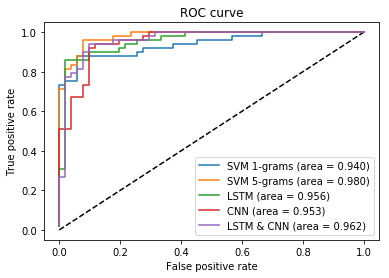

In [11]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_svm_1_grams, tpr_svm_1_grams, label='SVM 1-grams (area = {:.3f})'.format(auc_svm_1_grams))
plt.plot(fpr_svm_5_grams, tpr_svm_5_grams, label='SVM 5-grams (area = {:.3f})'.format(auc_svm_5_grams))
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (area = {:.3f})'.format(auc_lstm))
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.plot(fpr_ensemble, tpr_ensemble, label='LSTM & CNN (area = {:.3f})'.format(auc_ensemble))


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.show()
plt.savefig('roc_curve.png', bbox_inches='tight', dpi=1000)

In [12]:
ensemble_p

array([['@Fraulein_Antje @123Lenchen Weist du ob sie überhaupt noch im Land ist?',
        0.998137915, 0.00186205988],
       ['@HeikoMaas Bin 1947 geboren und habe mit diesem ganzen Scheiß nichts am Hut! Basta!',
        0.00821154525, 0.991788445],
       ['@laetacara @SebRoloff Soll ich Lyoner und Maggi mitbringen?',
        0.99040478, 0.00959521885],
       ['@sprachmittlerud @krippmarie Ja die von der Leyen....redet gerne wirr...kennen wir schon',
        0.02991152175, 0.97008848],
       ['@Anarcho161Zecke Die "Ehe für alle" ist nun per Definition für Menschen gleichen und verschiedenen Geschlechts vorgesehen. Auch mit neuem Personenstand wird man also heiraten dürfen.',
        0.989835, 0.0101650459],
       ['Ich bin tief bestürzt, ja fassungslos, dass sich jetzt auch noch Spitze d. Zentralkomitees d. Katholiken für einen Islam-Feiertag ausspricht',
        0.993110205, 0.0068898062],
       ['#Tuberkulose wurde vermehrt von #Flüchtlingen in Deutschland eingeschleppt. |LBR|